In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as ss
%matplotlib inline
import itertools
import lightgbm as lgbm
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import precision_score, recall_score, confusion_matrix,  roc_curve, precision_recall_curve, accuracy_score, roc_auc_score
from datetime import datetime
import lightgbm as lgbm
import warnings
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
import warnings

from contextlib import contextmanager

@contextmanager
def timer(title):
    t0 = time.time()
    yield
    print("{} - done in {:.0f}s".format(title, time.time() - t0))

warnings.filterwarnings('ignore') #ignore warning messages

In [3]:
data = pd.read_csv('../input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [4]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
display(data.head())
display(data.describe())
display(data.shape)
display(data.info())

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


(7043, 21)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


None

Reassign target, encode variables and replace missing values

In [6]:
# reassign target

data.Churn.replace(to_replace = dict(Yes=1, No=0),inplace=True)

In [7]:
# Encode object variables
col_name = ['SeniorCitizen','Churn']
data[col_name] = data[col_name].astype(object)

In [8]:
churn = data[(data['Churn'] != 0)]
no_churn = data[(data['Churn'] == 0)]

#------------COUNT-----------------------
trace = go.Bar(
        x = (data['Churn'].value_counts().values.tolist()), 
        y = ['Churn : no', 'Churn : yes'], 
        orientation = 'h', opacity = 0.8, 
        text=data['Churn'].value_counts().values.tolist(), 
        textfont=dict(size=15),
        textposition = 'auto',
        marker=dict(
        color=['lightblue','gold'],
        line=dict(color='#000000',width=1.5)
        ))

layout = dict(title =  'Count of attrition variable',
                        autosize = False,
                        height  = 500,
                        width   = 800)
                    
fig = dict(data = [trace], layout=layout)
py.iplot(fig)

#------------PERCENTAGE-------------------
trace = go.Pie(labels = ['Churn : no', 'Churn : yes'], values = data['Churn'].value_counts(), 
               textfont=dict(size=15), opacity = 0.8,
               marker=dict(colors=['lightblue','gold'], 
                           line=dict(color='#000000', width=1.5)))


layout = dict(title =  'Distribution of attrition variable',
                        autosize = False,
                        height  = 500,
                        width   = 800)
           
fig = dict(data = [trace], layout=layout)
py.iplot(fig)

In [9]:
def plot_distribution(var_select, bin_size) : 
    tmp1 = churn[var_select]
    tmp2 = no_churn[var_select]
    hist_data = [tmp1, tmp2]
    
    group_labels = ['Churn : yes', 'Churn : no']
    colors = ['gold', 'lightblue']

    fig = ff.create_distplot(hist_data, group_labels, colors = colors, show_hist = True, curve_type='kde', bin_size = bin_size)
    
    fig['layout'].update(title = var_select, autosize = False,
                        height  = 500,
                        width   = 800)

    py.iplot(fig, filename = 'Density plot')
    
plot_distribution('tenure', False)
plot_distribution('MonthlyCharges', False)

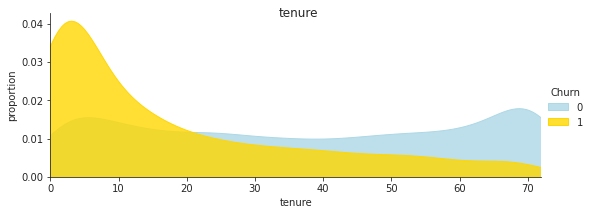

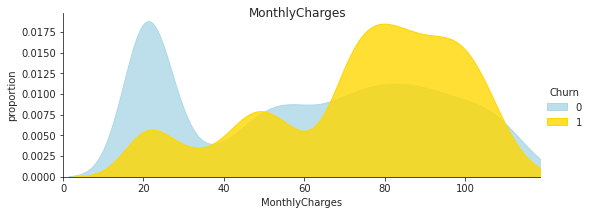

In [10]:
def plot_distribution_num(data_select) : 
    sns.set_style("ticks")
    s = sns.FacetGrid(data, hue = 'Churn',aspect = 2.5, palette ={0 : 'lightblue', 1 : 'gold'})
    s.map(sns.kdeplot, data_select, shade = True, alpha = 0.8)
    s.set(xlim=(0, data[data_select].max()))
    s.add_legend()
    s.set_axis_labels(data_select, 'proportion')
    s.fig.suptitle(data_select)
    plt.show()
    
plot_distribution_num('tenure')
plot_distribution_num('MonthlyCharges')

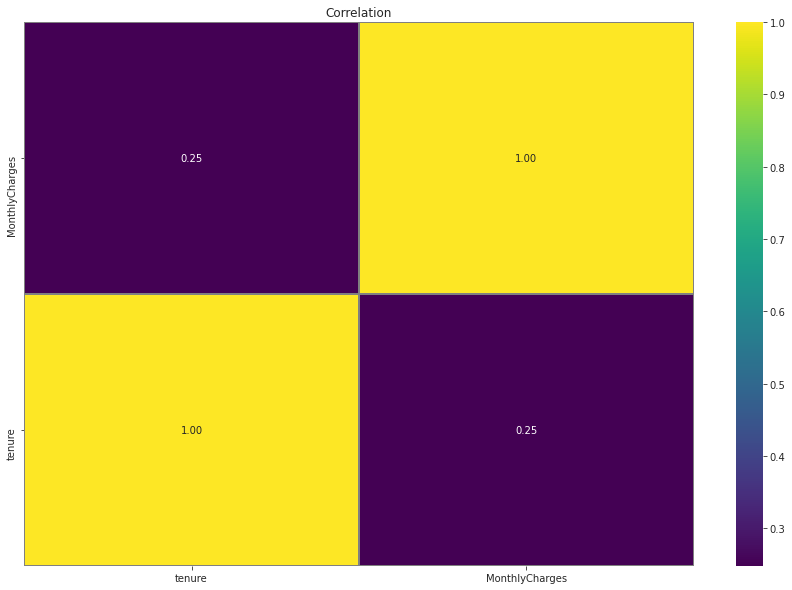

In [11]:
df_quant = data.select_dtypes(exclude=[object])
df_quant.head()
corr_quant = df_quant.corr()

fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_quant, annot=True, cmap = 'viridis', linewidths = .1, linecolor = 'grey', fmt=".2f")
ax.invert_yaxis()
ax.set_title("Correlation")
plt.show()

In [12]:
def barplot(var_select, x_no_numeric) :
    tmp1 = data[(data['Churn'] != 0)]
    tmp2 = data[(data['Churn'] == 0)]
    tmp3 = pd.DataFrame(pd.crosstab(data[var_select],data['Churn']), )
    tmp3['Attr%'] = tmp3[1] / (tmp3[1] + tmp3[0]) * 100
    if x_no_numeric == True  : 
        tmp3 = tmp3.sort_values(1, ascending = False)

    trace1 = go.Bar(
        x=tmp1[var_select].value_counts().keys().tolist(),
        y=tmp1[var_select].value_counts().values.tolist(),
        text=tmp1[var_select].value_counts().values.tolist(),
        textposition = 'auto',
        name='Churn : yes',opacity = 0.8, marker=dict(
        color='gold',
        line=dict(color='#000000',width=1)))

    trace2 = go.Bar(
        x=tmp2[var_select].value_counts().keys().tolist(),
        y=tmp2[var_select].value_counts().values.tolist(),
        text=tmp2[var_select].value_counts().values.tolist(),
        textposition = 'auto',
        name='Churn : no', opacity = 0.8, marker=dict(
        color='lightblue',
        line=dict(color='#000000',width=1)))
    
    trace3 =  go.Scatter(   
        x=tmp3.index,
        y=tmp3['Attr%'],
        yaxis = 'y2',
        name='% Churn', opacity = 0.6, marker=dict(
        color='black',
        line=dict(color='#000000',width=0.5
        )))

    layout = dict(title =  str(var_select),  autosize = False,
                        height  = 500,
                        width   = 800,
              xaxis=dict(), 
              yaxis=dict(title= 'Count'), 
              yaxis2=dict(range= [-0, 75], 
                          overlaying= 'y', 
                          anchor= 'x', 
                          side= 'right',
                          zeroline=False,
                          showgrid= False, 
                          title= '% Churn'
                         ))

    fig = go.Figure(data=[trace1, trace2, trace3], layout=layout)
    py.iplot(fig)

In [13]:
barplot('gender', True)
barplot('SeniorCitizen', True)
barplot('Dependents', True)
barplot('PhoneService', True)
barplot('MultipleLines', True)
barplot('InternetService', True)
barplot('OnlineSecurity', True)
barplot('Partner', True)
barplot('OnlineBackup', True)
barplot('DeviceProtection', True)
barplot('TechSupport', True)
barplot('StreamingTV', True)
barplot('StreamingMovies', True)
barplot('Contract', True)
barplot('PaperlessBilling', True)
barplot('PaymentMethod', True)

In [14]:
def plot_distribution_cat(feature1,feature2, df): 
    plt.figure(figsize=(18,5))
    plt.subplot(121)
    s = sns.countplot(x = feature1, hue='Churn', data = df, 
                      palette = {0 : 'lightblue', 1 :'gold'}, alpha = 0.8, 
                      linewidth = 0.4, edgecolor='grey') 
    s.set_title(feature1)
    for p in s.patches:
        s.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+30))
    
    plt.subplot(122)
    s = sns.countplot(x = feature2, hue='Churn', data = df, 
                      palette = {0 : 'lightblue', 1 :'gold'}, alpha = 0.8, 
                      linewidth = 0.4, edgecolor='grey') 
    s.set_title(feature2)
    for p in s.patches:
        s.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+30))
    plt.show()

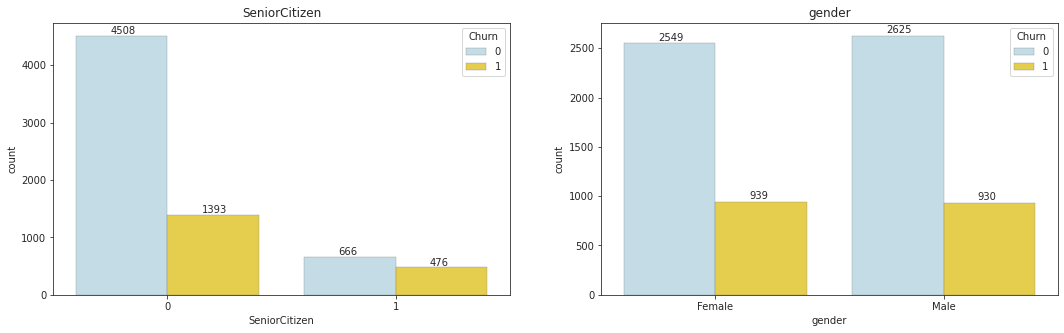

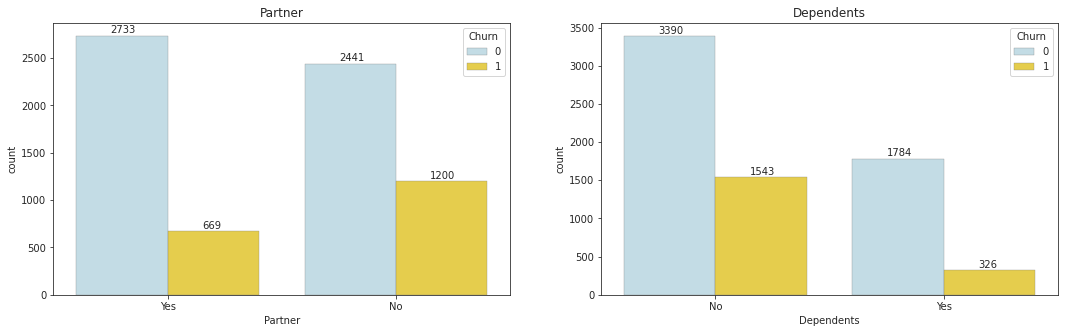

In [15]:
plot_distribution_cat('SeniorCitizen', 'gender', data)
plot_distribution_cat('Partner', 'Dependents', data)

**Feature Engineering**

In [16]:
data['TotalCharges'] = data['TotalCharges'].replace(" ", 0).astype('float64')

In [17]:
data.dtypes

customerID           object
gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [18]:
data.loc[:,'Engaged']=1 
data.loc[(data['Contract']=='Month-to-month'),'Engaged']=0

data.loc[:,'YandNotE']=0
data.loc[(data['SeniorCitizen']==0) & (data['Engaged']==0),'YandNotE']=1

data.loc[:,'ElectCheck']=0 
data.loc[(data['PaymentMethod']=='Electronic check') & (data['Engaged']==0),'ElectCheck']=1

data.loc[:,'fiberopt']=1 
data.loc[(data['InternetService']!='Fiber optic'),'fiberopt']=0

data.loc[:,'StreamNoInt']=1 
data.loc[(data['StreamingTV']!='No internet service'),'StreamNoInt']=0

data.loc[:,'NoProt']=1 
data.loc[(data['OnlineBackup']!='No') | (data['DeviceProtection']!='No') | (data['TechSupport']!='No'),'NoProt']=0

data['TotalServices'] = (data[['PhoneService', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']]== 'Yes').sum(axis=1)

In [19]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,MonthlyCharges,TotalCharges,Churn,Engaged,YandNotE,ElectCheck,fiberopt,StreamNoInt,NoProt,TotalServices
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,29.85,29.85,0,0,1,1,0,0,0,1
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,56.95,1889.50,0,1,0,0,0,0,0,3
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,53.85,108.15,1,0,1,0,0,0,0,3
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,42.30,1840.75,0,1,0,0,0,0,0,3
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,70.70,151.65,1,0,1,1,1,0,1,1


In [20]:
data.drop(columns  = ['Contract','DeviceProtection','Partner'],inplace=True)

data.head()

,customerID,gender,SeniorCitizen,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,MonthlyCharges,TotalCharges,Churn,Engaged,YandNotE,ElectCheck,fiberopt,StreamNoInt,NoProt,TotalServices
0,7590-VHVEG,Female,0,No,1,No,No phone service,DSL,No,Yes,...,29.85,29.85,0,0,1,1,0,0,0,1
1,5575-GNVDE,Male,0,No,34,Yes,No,DSL,Yes,No,...,56.95,1889.50,0,1,0,0,0,0,0,3
2,3668-QPYBK,Male,0,No,2,Yes,No,DSL,Yes,Yes,...,53.85,108.15,1,0,1,0,0,0,0,3
3,7795-CFOCW,Male,0,No,45,No,No phone service,DSL,Yes,No,...,42.30,1840.75,0,1,0,0,0,0,0,3
4,9237-HQITU,Female,0,No,2,Yes,No,Fiber optic,No,No,...,70.70,151.65,1,0,1,1,1,0,1,1


In [21]:
#customer id col
Id_col     = ['customerID']
#Target columns
target_col = ["Churn"]
#categorical columns
cat_cols   = data.nunique()[data.nunique() < 10].keys().tolist()
cat_cols   = [x for x in cat_cols if x not in target_col]
#numerical columns
num_cols   = [x for x in data.columns if x not in cat_cols + target_col + Id_col]
#Binary columns with 2 values
bin_cols   = data.nunique()[data.nunique() == 2].keys().tolist()
#Columns more than 2 values
multi_cols = [i for i in cat_cols if i not in bin_cols]

In [22]:
# label encoding binary columns
le = LabelEncoder()
for i in bin_cols:
    data[i] = le.fit_transform(data[i])

In [23]:
# duplicating columns for multi value columns
# data = pd.get_dummies(data = data, columns = multi_cols)

from sklearn.preprocessing import StandardScaler
#Scaling Numerical columns
std = StandardScaler()
scaled = std.fit_transform(data[num_cols])
scaled = pd.DataFrame(scaled,columns=num_cols)

In [24]:
#dropping original values merging scaled values for numerical columns
df_data_og = data.copy()
data = data.drop(columns = num_cols,axis = 1)
data = data.merge(scaled,left_index=True,right_index=True,how = "left")
data = data.drop(['customerID'],axis = 1)

In [25]:
data.head()

,gender,SeniorCitizen,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,TechSupport,StreamingTV,...,Engaged,YandNotE,ElectCheck,fiberopt,StreamNoInt,NoProt,TotalServices,tenure,MonthlyCharges,TotalCharges
0,0,0,0,0,No phone service,DSL,No,Yes,No,No,...,0,1,1,0,0,0,1,-1.277445,-1.160323,-0.992611
1,1,0,0,1,No,DSL,Yes,No,No,No,...,1,0,0,0,0,0,3,0.066327,-0.259629,-0.172165
2,1,0,0,1,No,DSL,Yes,Yes,No,No,...,0,1,0,0,0,0,3,-1.236724,-0.362660,-0.958066
3,1,0,0,0,No phone service,DSL,Yes,No,Yes,No,...,1,0,0,0,0,0,3,0.514251,-0.746535,-0.193672
4,0,0,0,1,No,Fiber optic,No,No,No,No,...,0,1,1,1,0,1,1,-1.236724,0.197365,-0.938874


In [26]:
data.StreamingTV.unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [27]:
data['PaymentMethod'] = data['PaymentMethod'].map( {'Electronic check': 0, 'Mailed check': 1, 'Bank transfer (automatic)': 2 ,'Credit card (automatic)': 3} ).astype(int)

data['StreamingMovies'] = data['StreamingMovies'].map( {'No': 0, 'Yes': 1, 'No internet service': 2 } ).astype(int)

data['OnlineBackup'] = data['OnlineBackup'].map( {'No': 0, 'Yes': 1, 'No internet service': 2 } ).astype(int)

data['TechSupport'] = data['TechSupport'].map( {'No': 0, 'Yes': 1, 'No internet service': 2 } ).astype(int)

data['MultipleLines'] = data['MultipleLines'].map( {'No': 0, 'Yes': 1, 'No phone service': 2 } ).astype(int)

data['InternetService'] = data['InternetService'].map( {'No': 0, 'DSL': 1, 'Fiber optic': 2 } ).astype(int)

data['OnlineSecurity'] = data['OnlineSecurity'].map( {'No': 0, 'Yes': 1, 'No internet service': 2 } ).astype(int)

data['StreamingTV'] = data['StreamingTV'].map( {'No': 0, 'Yes': 1, 'No internet service': 2 } ).astype(int)

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Dependents        7043 non-null   int64  
 3   PhoneService      7043 non-null   int64  
 4   MultipleLines     7043 non-null   int64  
 5   InternetService   7043 non-null   int64  
 6   OnlineSecurity    7043 non-null   int64  
 7   OnlineBackup      7043 non-null   int64  
 8   TechSupport       7043 non-null   int64  
 9   StreamingTV       7043 non-null   int64  
 10  StreamingMovies   7043 non-null   int64  
 11  PaperlessBilling  7043 non-null   int64  
 12  PaymentMethod     7043 non-null   int64  
 13  Churn             7043 non-null   int64  
 14  Engaged           7043 non-null   int64  
 15  YandNotE          7043 non-null   int64  
 16  ElectCheck        7043 non-null   int64  


In [29]:
data[['tenure','Churn']].groupby(['tenure'],as_index=False).mean().sort_values(by='tenure',ascending=True)

,tenure,Churn
0,-1.318165,0.000000
1,-1.277445,0.619902
2,-1.236724,0.516807
3,-1.196004,0.470000
4,-1.155283,0.471591
...,...,...
68,1.450820,0.090000
69,1.491540,0.084211
70,1.532261,0.092437
71,1.572981,0.035294


In [30]:
data['tenure'] = pd.qcut(data['tenure'], 5)
data[['tenure','Churn']].groupby(['tenure'],as_index=False).mean().sort_values(by='tenure',ascending=True)

,tenure,Churn
0,"(-1.319, -1.074]",0.529372
1,"(-1.074, -0.504]",0.334288
2,"(-0.504, 0.311]",0.223722
3,"(0.311, 1.125]",0.155556
4,"(1.125, 1.614]",0.066098


In [31]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['tenure'] = le.fit_transform(data['tenure'])

In [32]:
def correlation_plot():
    # correlation 
    correlation = data.corr()
    #tick labels
    matrix_cols = correlation.columns.tolist()
    #convert to array
    corr_array = np.array(correlation)
    trace = go.Heatmap( z = corr_array,
                      x = matrix_cols,
                      y = matrix_cols,
                      colorscale='Viridis',
                      colorbar = dict(),
                      )
    
    layout = go.Layout(dict(title='Correlation Matrix for Variables',
                           margin = dict(r = 0, l= 210,
                                         t = 25, b = 210,
                                        ),
                           yaxis = dict(tickfont = dict(size = 9)),
                           xaxis = dict(tickfont = dict(size = 9)),
                           )
                      )
    fig = go.Figure(data = [trace],layout = layout)
    py.iplot(fig)

In [33]:
correlation_plot()

## Remove collinear features

In [34]:
threshold = 0.9
corr_matrix = data.corr().abs()

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k = 1).astype(np.bool))
upper.head()

to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

print('There are %d columns to remove:' %(len(to_drop)))
data= data.drop(columns = to_drop)
to_drop

There are 1 columns to remove:


['MonthlyCharges']

In [35]:
correlation_plot()

In [36]:
# Def X and Y
y = np.array(data.Churn.tolist())
X = np.array(data.drop('Churn', 1))

In [37]:
# Train_test split
random_state = 42
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = random_state)

In [38]:
from sklearn.svm import SVC
sc = SVC(C=0.01, kernel='linear')
sc.fit(X_train,y_train)
svc_y_pred = sc.fit(X_train, y_train).predict(X_test)
print(classification_report(y_test, svc_y_pred))

NameError: name 'classification_report' is not defined

In [39]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report 
knnm = KNeighborsClassifier(n_neighbors=10)
knnm.fit(X_train,y_train)
knnm.score(X_test,y_test)

0.7998580553584103

In [40]:
from sklearn.linear_model import LogisticRegression
logm = LogisticRegression(C=0.1)
logm.fit(X_train,y_train)
logm.score(X_test,y_test)
log_y_pred = logm.fit(X_train, y_train).predict(X_test)
print(classification_report(y_test, log_y_pred))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88      1036
           1       0.69      0.58      0.63       373

    accuracy                           0.82      1409
   macro avg       0.78      0.75      0.76      1409
weighted avg       0.81      0.82      0.82      1409



In [41]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
rfc.score(X_test,y_test)

0.7849538679914834

In [42]:
from lightgbm import LGBMClassifier
lgbmc = LGBMClassifier(random_state = 42)
lgbmc.fit(X_train,y_train)
lgbmc.score(X_test,y_test)

0.8069552874378992

In [43]:
scores = {'SVMClassifier': sc.score(X_test,y_test),
          'KNeighbors': knnm.score(X_test,y_test),
          'LogisticRegression':logm.score(X_test,y_test),
          'RandomForestClassifer': rfc.score(X_test,y_test),
          'LGBMClassifier': lgbmc.score(X_test,y_test)
         }

In [44]:
score_df = pd.DataFrame(scores.values(),scores.keys())
score_df.head()

,0
SVMClassifier,0.819021
KNeighbors,0.799858
LogisticRegression,0.821150
RandomForestClassifer,0.784954
LGBMClassifier,0.806955


In [45]:
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_test,y_test)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 10.0, 'penalty': 'l2'}
accuracy : 0.8119047619047619


In [46]:
logreg2=LogisticRegression(C=1,penalty="l2")
logreg2.fit(X_train,y_train)
print("score %",logreg2.score(X_test,y_test)*100)
logreg2_y_pred = logreg2.fit(X_train, y_train).predict(X_test)
print(classification_report(y_test, logreg2_y_pred))

score % 81.97303051809794
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.69      0.59      0.63       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.81      0.82      0.82      1409



In [47]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   1.3s
[CV 2/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   1.2s
[CV 3/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   2.5s
[CV 4/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   2.8s
[CV 5/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   2.9s
[CV 1/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   1.8s
[CV 2/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   1.8s
[CV 3/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   1.8s
[CV 4/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   1.8s
[CV 5/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   1.8s
[CV 1/5] END ..................C=0.1, gamma=0.01, kernel=rbf; total time=   1.9s
[CV 2/5] END ..................C=0.1, gamma=0.0

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [48]:
grid_predictions = grid.predict(X_test)
# print classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1036
           1       0.70      0.57      0.63       373

    accuracy                           0.82      1409
   macro avg       0.78      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409



In [49]:
from sklearn.svm import SVC
sc = SVC(C=1000, kernel='rbf',gamma=0.0001)
sc.fit(X_train,y_train)
svc_y_pred = sc.fit(X_train, y_train).predict(X_test)
print(classification_report(y_test, svc_y_pred))
sc.score(X_test,y_test)*100

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1036
           1       0.70      0.57      0.63       373

    accuracy                           0.82      1409
   macro avg       0.78      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409



82.04400283889282

In [50]:
confusion_matrix(y_test, svc_y_pred)

array([[945,  91],
       [162, 211]])

In [51]:
svc_y_pred_tr = sc.fit(X_train, y_train).predict(X_train)
svc_y_pred_ts = sc.fit(X_train, y_train).predict(X_test)

svc_new_train_as = accuracy_score(y_train, svc_y_pred_tr)
svc_new_as = accuracy_score(y_test, svc_y_pred_ts)

print(f"Accuracy score for test data : {svc_new_as}")
print(f"Accuracy score for train data : {svc_new_train_as}")

Accuracy score for test data : 0.8204400283889283
Accuracy score for train data : 0.8036918707845225


Text(0.5, 1.0, 'ROC Curve')

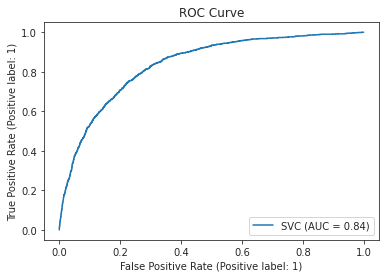

In [52]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(sc, X_train, y_train)
plt.title('ROC Curve')